In [4]:
!pip install pygad

     |████████████████████████████████| 53 kB 1.4 MB/s 


In [5]:
import pygad as ga
import numpy as np
import random as rand
from time import time

In [ ]:
# 1) Labirynt będzie w formie macierzy 10x10
# 2) Chromosomy beda dlugosci 30 (tyle ile maksymalna liczna ruchow) i geny to [1,2,3,4]
# 3) Moja funkcja fitness zmierza do 0 przy idealnym wykonaniu zadania i bierze pod uwage takie parametry jak:
#     wyjście zupełnie poza labirynt, wejście w ściane w labiryncie, zakończenie w wyjściu labiryntu, odlełgość od ostatniego punktu wędrówki do końca.
# 4) Moim zdaniem tak, aczkolwiek mniej to było wymagane niz zakladalem na poczatku

In [50]:
def fitness_func(solution, solution_idx):
  lx = []
  ly = []
  #twoerzenie labiryntu
  rand.seed(7)
  labirynt = np.ones((12, 12))
  labirynt[1:-1, 1:-1] = 0
  for i in range(50):
    a = rand.randint(1,10)
    b = rand.randint(1,10)
    labirynt[a][b] = 1
    lx.append(a)
    ly.append(b)
  zwyciestwo = 0
  #zaczynamy w punkcie (1,1)
  start = [1,1]
  bledy = 0
  zwyciestwo = 0
  wyjscie_za_labirynt = 0
  polozenie = start

# ruchy: 1 - "w gore", 2 - "w lewo", 3 - "w dol", 4 - "w prawo"
  for i in range(0,len(solution)):
    if solution[i] == 1:
      polozenie[0] = polozenie[0] - 1
    if solution[i] == 2:
      polozenie[1] = polozenie[1] - 1
    if solution[i] == 3:
      polozenie[0] = polozenie[0] + 1
    if solution[i] == 4:
      polozenie[1] = polozenie[1] + 1

    #sprawdzenie i karanie za wyjscie poza labirynt
    if polozenie[0]>10 or polozenie[0]<1 or polozenie[1]>10 or polozenie[1]<1:
      wyjscie_za_labirynt = wyjscie_za_labirynt + 1

    #sprawdzenie i karanie wejscia w sciane
    for j in range(len(lx)):
      if polozenie[0] == lx[j] and polozenie[1] == ly[j]:
        bledy = bledy + 1
    #nagroda za dojście do mety
    if polozenie[0] == 10 and polozenie[1] == 10:
      zwyciestwo = 1000
    else:
      zwyciestwo = 0
  #odleglosc zakonczenia drogi od mety
  odleglosc = abs(polozenie[0])*abs(polozenie[1])
  #funkcja fitness 
  fitness = (((1000-zwyciestwo)+bledy+30*wyjscie_za_labirynt)+(100-odleglosc)*10)*(-1)
  return fitness
fitness_function = fitness_func

Przy podanych parametrach najlepszy wynik funkcji fitness jaki udało mi się osiągnąć to -1

Parameters of the best solution : [3. 4. 3. 1. 3. 4. 4. 4. 3. 4. 4. 1. 3. 4. 3. 1. 3. 3. 3. 4. 2. 3. 3. 4.
 1. 3. 3. 2. 4. 4.]
Fitness value of the best solution = -3
Długość działania algorytmu 34.66562485694885


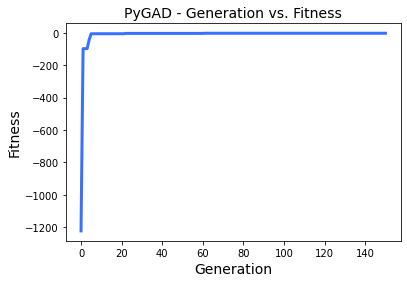

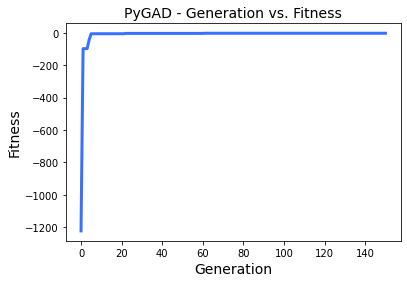

In [58]:
gene_space = [1, 2, 3, 4]
sol_per_pop = 500
num_genes = 30
fitness_function = fitness_func


num_parents_mating = 250
num_generations = 150
keep_parents = 10
stop_criteria = "reach_0"
parent_selection_type = "sss"

crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 20

ga_instance = ga.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                      stop_criteria = stop_criteria)

start = time()
ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
end = time()
print("Długość działania algorytmu", end - start)
ga_instance.plot_fitness()